In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import cbsodata

In [22]:
data_regions = pd.DataFrame(cbsodata.get_data('84709ENG'))
data_pt = pd.DataFrame(cbsodata.get_data('84707ENG'))



In [5]:
data_regions.set_index('ID', inplace=True)
data_regions.head()

,Population,Sex,PersonalCharacteristics,ModesOfTravel,Margins,RegionCharacteristics,Periods,Trips_1,DistanceTravelled_2,TimeTravelled_3,Trips_4,DistanceTravelled_5,TimeTravelled_6
ID,,,,,,,,,,,,,
0,Population 6 years or older,Total male and female,Total persons,Total,Value,The Netherlands,2018,2.78,36.16,74.60,1015.0,13200.0,453.8
1,Population 6 years or older,Total male and female,Total persons,Total,Value,The Netherlands,2019,2.71,36.00,74.39,989.0,13140.0,452.6
2,Population 6 years or older,Total male and female,Total persons,Total,Value,The Netherlands,2020,2.35,24.88,61.96,861.0,9105.0,378.0
3,Population 6 years or older,Total male and female,Total persons,Total,Value,The Netherlands,2021,2.51,27.24,69.85,915.0,9942.0,424.9
4,Population 6 years or older,Total male and female,Total persons,Total,Value,Noord-Nederland (LD),2018,2.77,40.99,74.28,1011.0,14962.0,451.9


In [6]:
# selecting needed columns
data_regions = data_regions[['PersonalCharacteristics', 'ModesOfTravel','DistanceTravelled_2']]
data_regions

,PersonalCharacteristics,ModesOfTravel,DistanceTravelled_2
ID,,,
0,Total persons,Total,36.16
1,Total persons,Total,36.00
2,Total persons,Total,24.88
3,Total persons,Total,27.24
4,Total persons,Total,40.99
...,...,...,...
443515,No driver's license; under 17,Other,NaN
443516,No driver's license; under 17,Other,NaN
443517,No driver's license; under 17,Other,NaN


In [7]:
# rename columns
data_regions.columns = ['Personal characteristics','Modes of travel','Distance travelled']

# selecting rows based on condition
options_ovchipcard = ['Students with week pass publ. transp.',
                    'Persons without student publ.transp.card'] 
options_travelmode = ['Passenger car (driver)','Train']
rslt_data_regions = data_regions[data_regions['Personal characteristics'].isin(options_ovchipcard) &
                    data_regions['Modes of travel'].isin(options_travelmode)] 


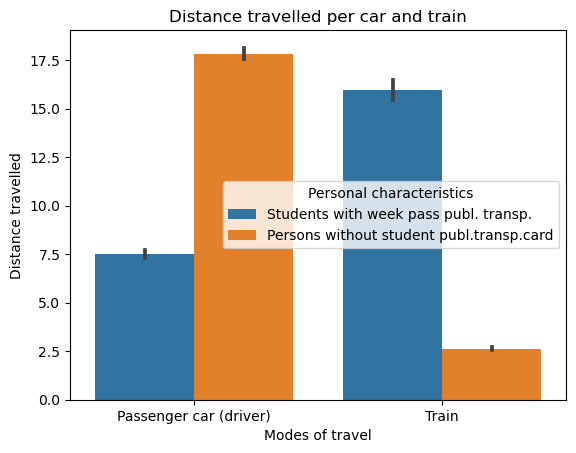

In [8]:
# making barplot
student_ov_plot = sns.barplot(x='Modes of travel', y='Distance travelled', data=rslt_data_regions, hue ='Personal characteristics')
plt.title(f'Distance travelled per car and train')
student_ov_plot.figure.savefig(f'C:/Users/josep/Documents/Documenten-Josephine/Studeren/TU Delft/Transport, Infrastructure and Logistics/Q1 Y1/TIL Python programming/TIL6022-LabAssignments-group-11/Project/student_ov.png')
plt.show()
